**<title>Focos de incêndio por Unidade de Conservação Estadual em 2019.</title>**

In [1]:
#Importação das Bibliotecas
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Leitura do shp de focos de 2019 de incêndio no estado do RJ baixados do BDqueimadas/INPE.
# Leitura do shp de Unidades de Conservação(GeoPortal Inea).
focos_2019 = gpd.read_file('dados/Focos_2019-01-01_2019-12-31.shp')
Ucs = gpd.read_file('dados/gpl_ucs_estaduais_dez20.shp')

In [3]:
# Conversão dos limites das UCS e dos focos para coordenadas geográficas com datun wgs84.
Ucs = Ucs.to_crs("EPSG:4326")
focos = focos_2019.to_crs("EPSG:4326")

In [4]:
# Define função que gera o plot dos focos por UC, e salva o plot, os limites da Uc e os focos no formato kml.

def PlotSaveFocosUc(Ucs, focos):
    for i in Ucs.index:
        Uc = Ucs[Ucs.index == i]  # Define a UC.
        foco_uc = gpd.overlay(focos, Uc, how='intersection',
                              keep_geom_type=False)  # Faz a intercessão dos focos com a UC.
        if foco_uc.empty == True:
            print(
                f'A UC {Uc.rotulo[i]} não possui focos dentro dos seus limites')  # Se o resultado da intercessão for vazio printa a msg padrão com
        else:                                                                     # o nome da Uc.
            # Plota e salva o plot no formato .png
            ax = Uc.plot(color='white', edgecolor='k')
            foco_uc.plot(ax=ax, marker='x', color='red', markersize=5)
            plt.title(f'{Ucs.rotulo[i]} - Quantidade de focos:{len(foco_uc)}')
            plt.savefig(f'dados/result/{Ucs.rotulo[i]}_focos_2019.png')
            plt.rcParams.update({'figure.max_open_warning': 0})
            # Salva no formato kml apenas os limites da Uc iterada e os focos que fazem intersecção com ela.
            fiona.supported_drivers['KML'] = 'rw'
            gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
            Uc.to_file(f'dados/result/{Ucs.rotulo[i]}_limite.kml', driver='KML')
            foco_uc.to_file(f'dados/result/{Ucs.rotulo[i]}_focos_2019.kml', driver='KML')

A UC APA PAU BRASIL não possui focos dentro dos seus limites
A UC FLOE JOSE ZAGO não possui focos dentro dos seus limites
A UC APA DE SEPETIBA II não possui focos dentro dos seus limites
A UC RDS DO AVENTUREIRO não possui focos dentro dos seus limites
A UC RESEX MARINHA DE ITAIPU não possui focos dentro dos seus limites
A UC REBIO PRAIA DO SUL não possui focos dentro dos seus limites
A UC REBIO DE ARARAS não possui focos dentro dos seus limites
A UC PE DO GRAJAU não possui focos dentro dos seus limites
A UC PE DO DESENGANO não possui focos dentro dos seus limites
A UC PE DA CHACRINHA não possui focos dentro dos seus limites


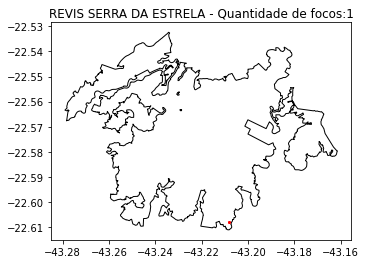

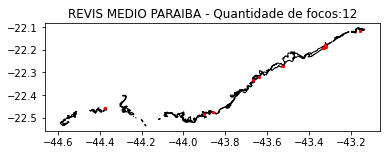

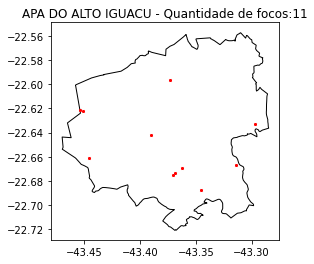

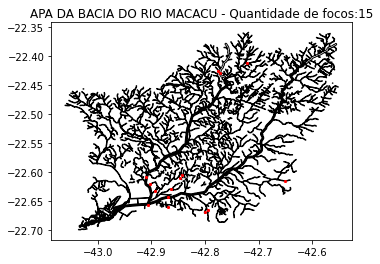

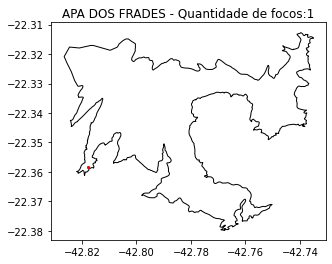

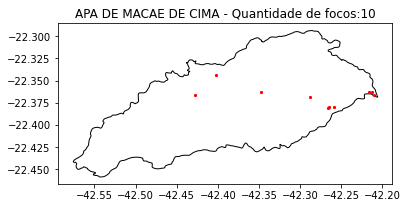

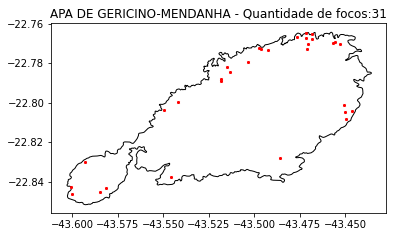

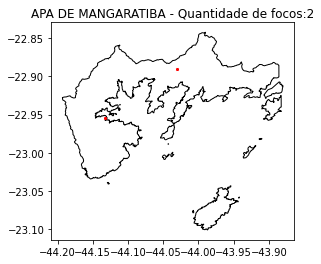

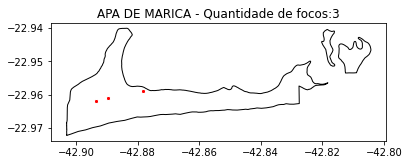

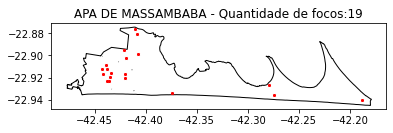

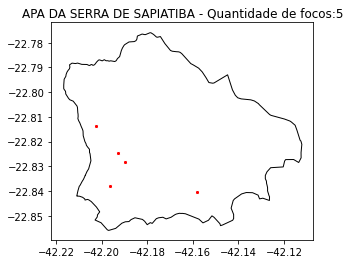

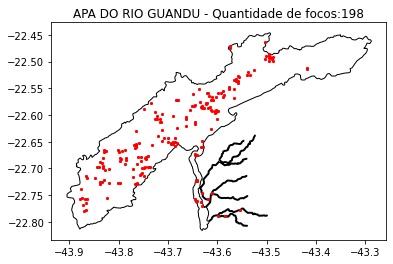

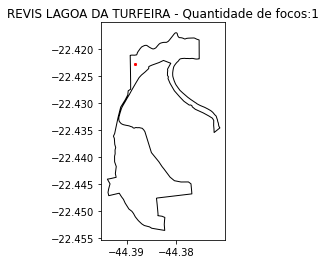

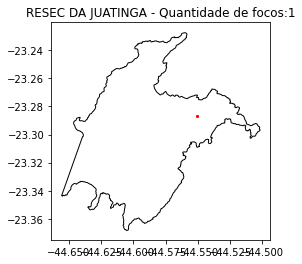

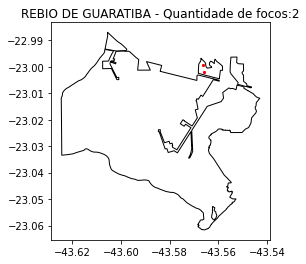

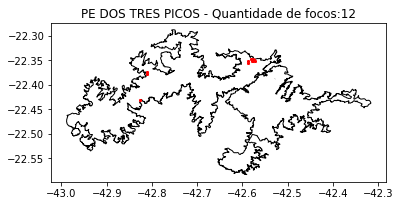

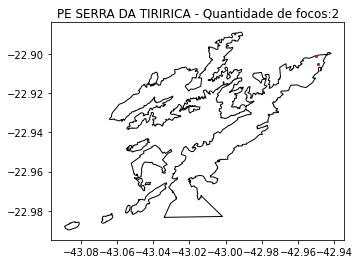

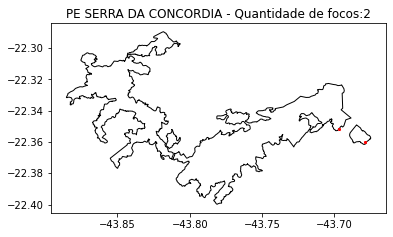

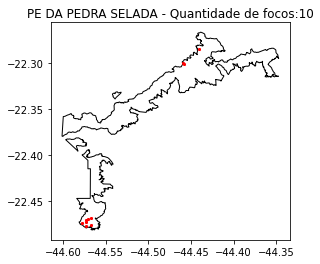

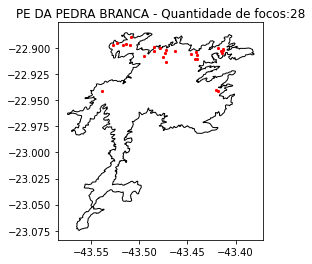

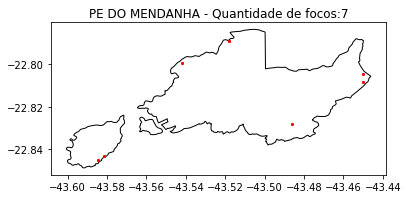

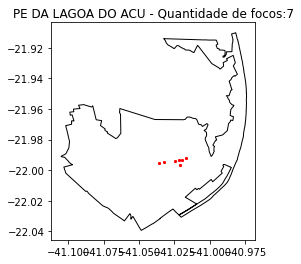

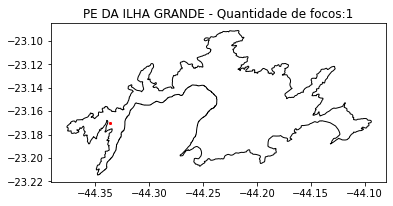

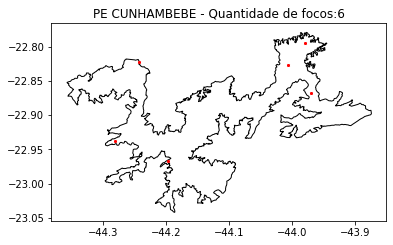

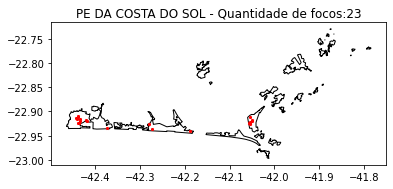

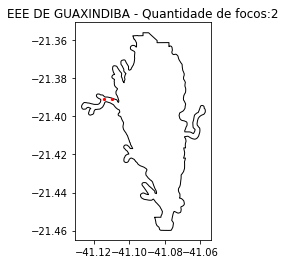

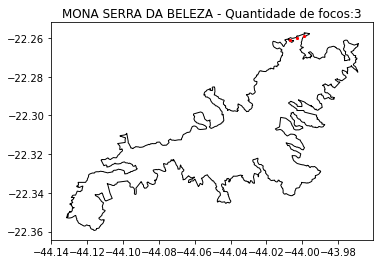

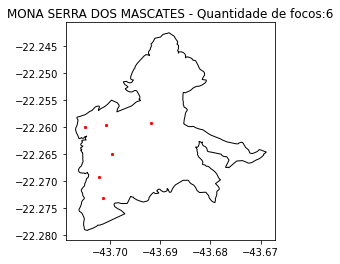

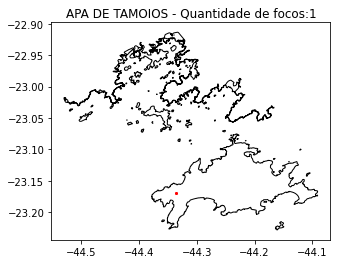

In [5]:
PlotSaveFocosUc(Ucs, focos)